In [1]:
# Cell 1: Imports & constants (with debug info)
import os
import glob
import pandas as pd
from PIL import Image

PROCESSED_DIR = os.path.abspath(os.path.join('..', 'data', 'processed'))

print("PROCESSED_DIR:", PROCESSED_DIR)
print("  Exists:", os.path.exists(PROCESSED_DIR))
print("  Is directory:", os.path.isdir(PROCESSED_DIR))


PROCESSED_DIR: c:\Users\pawel\Desktop\EARIN_GR_5\data\processed
  Exists: True
  Is directory: True


In [2]:
import os
import glob

PROCESSED_DIR = "./data/processed"  

print("\nTop-level contents of processed/:")
entries = os.listdir(PROCESSED_DIR)
for entry in entries[:20]:
    print(" ", entry)
if len(entries) > 20:
    print("  ...")

if not entries:
    raise RuntimeError(f"No files found in {PROCESSED_DIR}")

first_file = entries[0]
# Find the suffix starting at the first dot, e.g. ".jpg.chip.jpg"
dot_index = first_file.find('.')
if dot_index == -1:
    raise RuntimeError(f"First file '{first_file}' has no suffix to match.")

suffix = first_file[dot_index:]  # e.g. ".jpg.chip.jpg"
print(f"\nDetected suffix from first file: {suffix!r}")

# ─── 3) Glob for all files ending with that suffix ────────────────
pattern = os.path.join(PROCESSED_DIR, f"*{suffix}")
print(f"\nUsing glob pattern: {pattern!r}")
file_paths = glob.glob(pattern)

# ─── 4) Log results ───────────────────────────────────────────────
print(f"Found {len(file_paths)} files matching '*{suffix}'")
if file_paths:
    print("First 10 matches:")
    for p in file_paths[:10]:
        print(" ", p)
else:
    print("No files found. Check suffix and directory structure.")



Top-level contents of processed/:
  100_0_0_20170112213500903.jpg.chip.jpg
  100_0_0_20170112215240346.jpg.chip.jpg
  100_1_0_20170110183726390.jpg.chip.jpg
  100_1_0_20170112213001988.jpg.chip.jpg
  100_1_0_20170112213303693.jpg.chip.jpg
  100_1_0_20170112215032192.jpg.chip.jpg
  100_1_0_20170117195420803.jpg.chip.jpg
  100_1_0_20170119212053665.jpg.chip.jpg
  100_1_2_20170105174847679.jpg.chip.jpg
  100_1_2_20170112213615815.jpg.chip.jpg
  100_1_2_20170112222336458.jpg.chip.jpg
  101_0_0_20170112213500903.jpg.chip.jpg
  101_1_2_20170105174739309.jpg.chip.jpg
  103_0_2_20170112213001988.jpg.chip.jpg
  105_0_0_20170112213001988.jpg.chip.jpg
  105_1_0_20170112213001988.jpg.chip.jpg
  105_1_0_20170112213021902.jpg.chip.jpg
  105_1_0_20170112213507183.jpg.chip.jpg
  105_1_1_20170112213303693.jpg.chip.jpg
  10_0_0_20161220222308131.jpg.chip.jpg
  ...

Detected suffix from first file: '.jpg.chip.jpg'

Using glob pattern: './data/processed\\*.jpg.chip.jpg'
Found 23707 files matching '*.jpg.

In [3]:
# Cell 3: Parse filenames and build images_df
records = []
for img_path in file_paths:
    filename = os.path.basename(img_path)
    # split into at most 4 parts to isolate age,gender,race
    parts = filename.split('_', 3)
    if len(parts) < 4:
        print(f"Skipping malformed filename: {filename}")
        continue

    try:
        age    = int(parts[0])
        gender = int(parts[1])   # 0=male,1=female
        race   = int(parts[2])   # 0–4
    except ValueError:
        print(f"Skipping non-integer fields in: {filename}")
        continue

    # read dimensions (PIL should handle the final .jpg)
    try:
        with Image.open(img_path) as img:
            width, height = img.size
    except Exception as e:
        print(f"Could not open {filename}: {e}")
        continue

    file_size = os.path.getsize(img_path)
    records.append({
        'filename': filename,
        'age': age,
        'gender': gender,
        'race': race,
        'width': width,
        'height': height,
        'file_size_bytes': file_size
    })

images_df = pd.DataFrame(records)
print(f"\nBuilt DataFrame with {len(images_df)} entries")
images_df.head()


Skipping malformed filename: 39_1_20170116174525125.jpg.chip.jpg
Skipping malformed filename: 61_1_20170109142408075.jpg.chip.jpg
Skipping malformed filename: 61_1_20170109150557335.jpg.chip.jpg

Built DataFrame with 23704 entries


,filename,age,gender,race,width,height,file_size_bytes
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,64,64,2520
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,64,64,2540
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,64,64,2788
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,64,64,2310
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,64,64,2516


In [4]:
# Cell 4: Summary statistics for age, dimensions, and size
print("Age summary:")
print(images_df['age'].describe(), "\n")

print("Image dimensions summary:")
print(images_df[['width','height']].describe(), "\n")

print("File size summary (bytes):")
print(images_df['file_size_bytes'].describe())


Age summary:
count    23704.000000
mean        33.299992
std         19.885628
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64 

Image dimensions summary:
         width   height
count  23704.0  23704.0
mean      64.0     64.0
std        0.0      0.0
min       64.0     64.0
25%       64.0     64.0
50%       64.0     64.0
75%       64.0     64.0
max       64.0     64.0 

File size summary (bytes):
count    23704.000000
mean      2052.427354
std        240.049544
min        820.000000
25%       1890.000000
50%       2054.000000
75%       2211.000000
max       3359.000000
Name: file_size_bytes, dtype: float64


In [5]:
# Cell 5: Categorical distributions (counts)
print("Gender distribution (0=male,1=female):")
print(images_df['gender'].value_counts(), "\n")

print("Race distribution (0=W,1=B,2=A,3=I,4=O):")
print(images_df['race'].value_counts())


Gender distribution (0=male,1=female):
gender
0    12390
1    11314
Name: count, dtype: int64 

Race distribution (0=W,1=B,2=A,3=I,4=O):
race
0    10077
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64


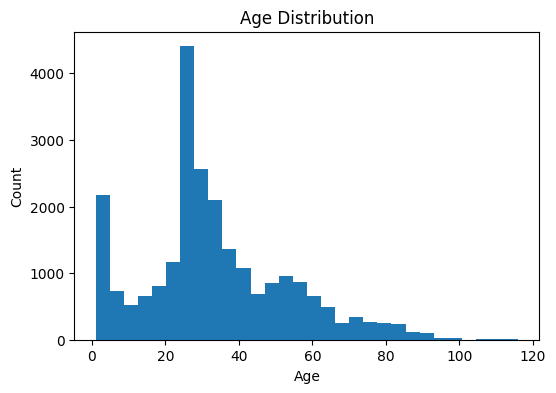

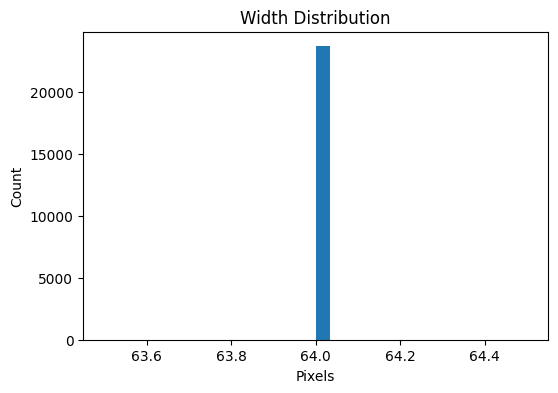

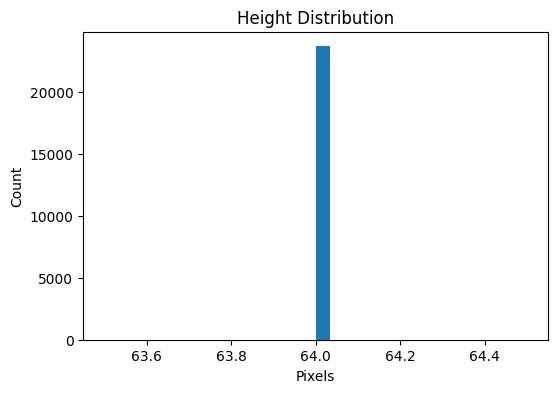

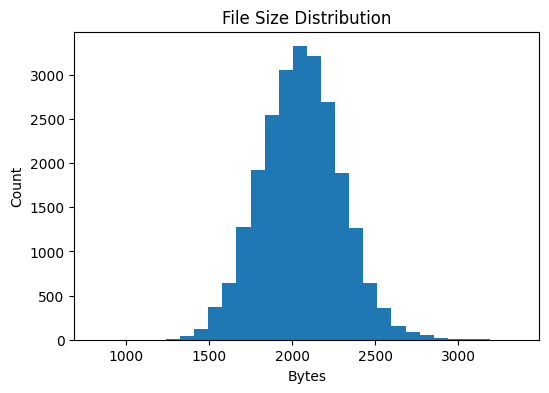

In [ ]:
# Cell 6: Histograms of numeric features
import matplotlib.pyplot as plt

# Age
plt.figure(figsize=(6,4))
plt.hist(images_df['age'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:

# File size
plt.figure(figsize=(6,4))
plt.hist(images_df['file_size_bytes'], bins=30)
plt.title("File Size Distribution")
plt.xlabel("Bytes")
plt.ylabel("Count")
plt.show()


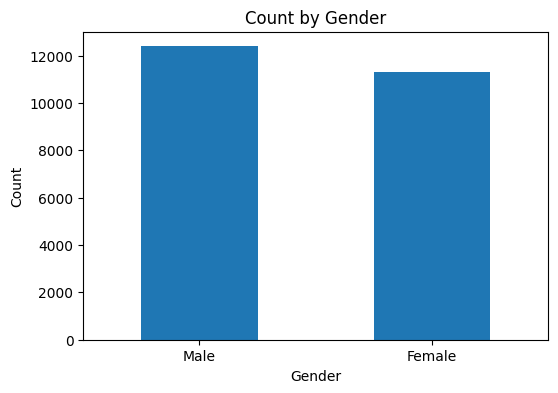

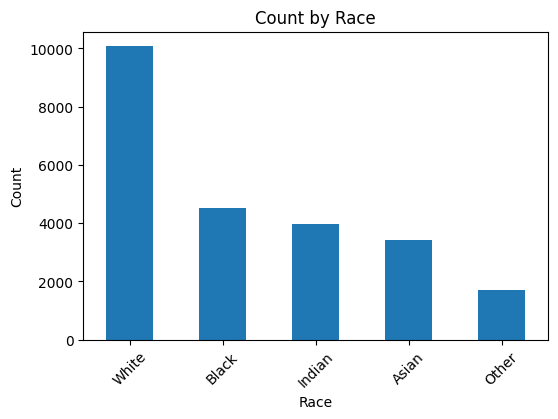

In [ ]:
# Cell 7: Bar plots for gender and race
plt.figure(figsize=(6,4))
images_df['gender'].map({0:'Male',1:'Female'}).value_counts().plot(kind='bar')
plt.title("Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:

plt.figure(figsize=(6,4))
race_labels = {0:'White',1:'Black',2:'Asian',3:'Indian',4:'Other'}
images_df['race'].map(race_labels).value_counts().plot(kind='bar')
plt.title("Count by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


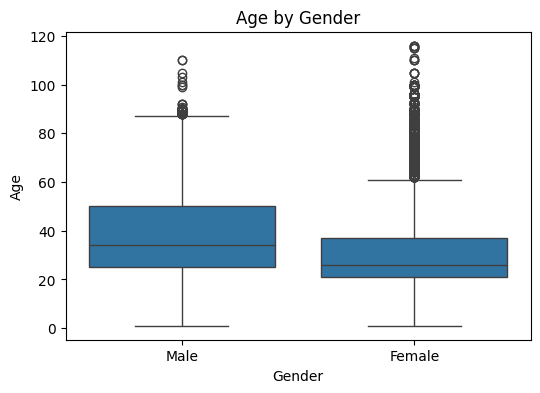

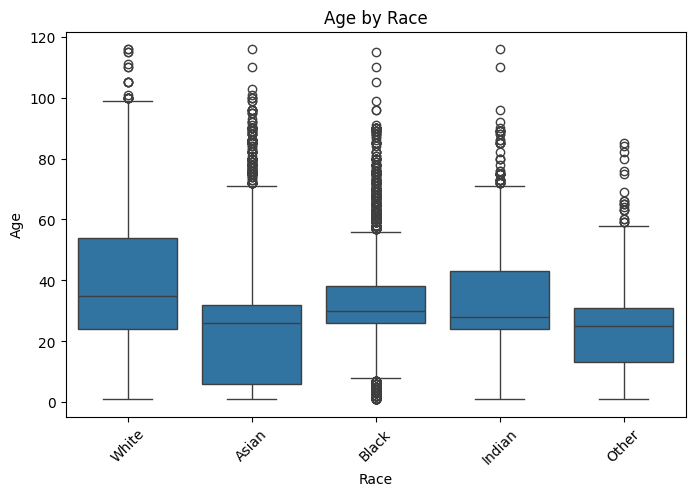

In [ ]:
# Cell 8: Boxplots of age by gender and race
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=images_df['gender'].map({0:'Male',1:'Female'}), y='age', data=images_df)
plt.title("Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x=images_df['race'].map(race_labels), y='age', data=images_df)
plt.title("Age by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


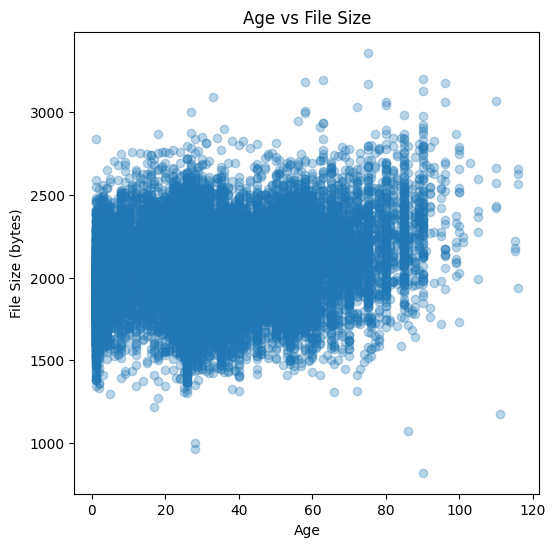

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(images_df['age'], images_df['file_size_bytes'], alpha=0.3)
plt.title("Age vs File Size")
plt.xlabel("Age")
plt.ylabel("File Size (bytes)")
plt.show()
